In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [68]:
data=pd.read_csv('Heart_disease.csv',encoding='latin1')

In [69]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [70]:
data.shape

(1319, 9)

In [71]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [72]:
lb = LabelEncoder()

In [73]:
data['Result'] = lb.fit_transform(data['Result'])

In [74]:
data['Result'] .unique()

array([0, 1])

In [75]:
data['Result'].value_counts()

Result
1    810
0    509
Name: count, dtype: int64

# **Analyzing The Data**

In [76]:
Discrete_features=[feature for feature in data.columns if (data[feature].dtypes !='O') and (len(data[feature].unique()) < 25 ) ]
Discrete_features

['Gender', 'Result']

In [77]:
numerical_features=[features for features in data.columns if data[features].dtypes != "O"]
numerical_features

['Age',
 'Gender',
 'Heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Blood sugar',
 'CK-MB',
 'Troponin',
 'Result']

In [78]:
continous_features=[feature for feature in numerical_features if feature not in Discrete_features]
continous_features

['Age',
 'Heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Blood sugar',
 'CK-MB',
 'Troponin']

So, from this observation most of the features have the continous values

### Checking The Relationship Between the Discrete Feature and Dependent Variable

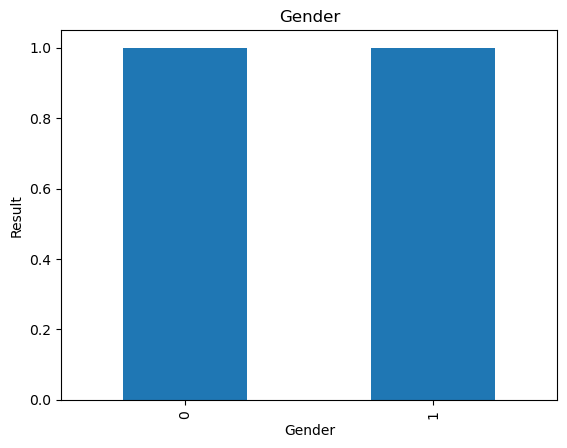

In [79]:
data=data.copy()
data.groupby('Gender')['Result'].median().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Result')
plt.title('Gender')
plt.show()

### Plotting the continous_features in Histogram to check if it is skewed data or not

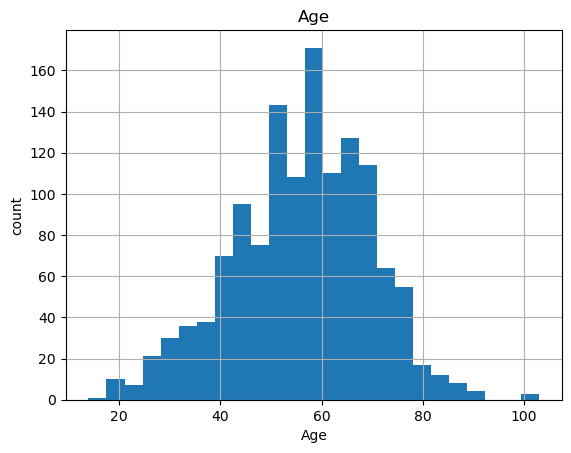

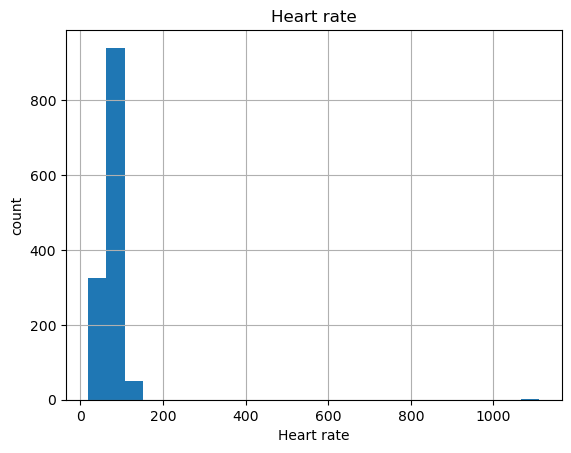

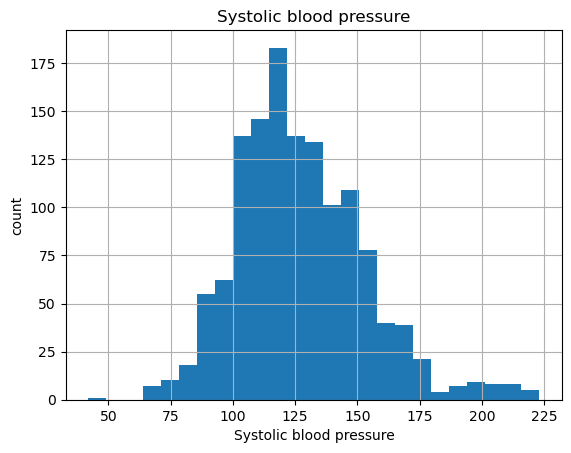

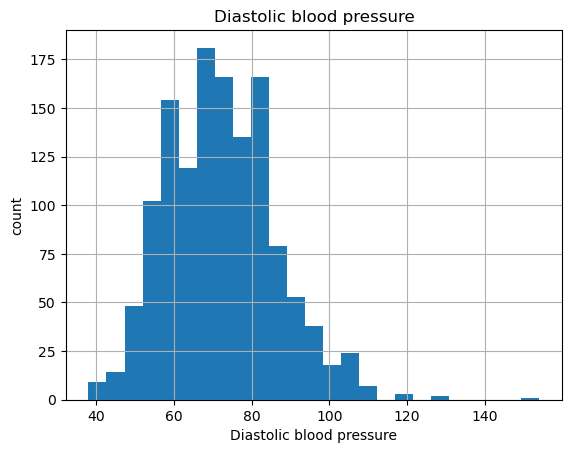

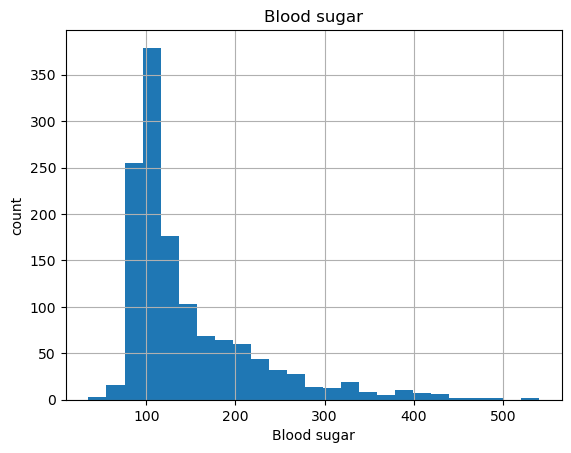

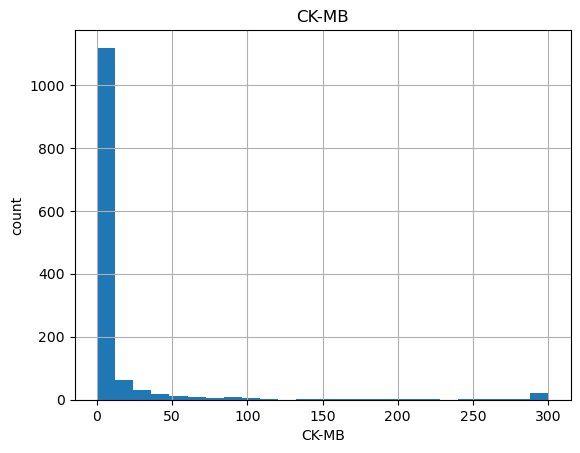

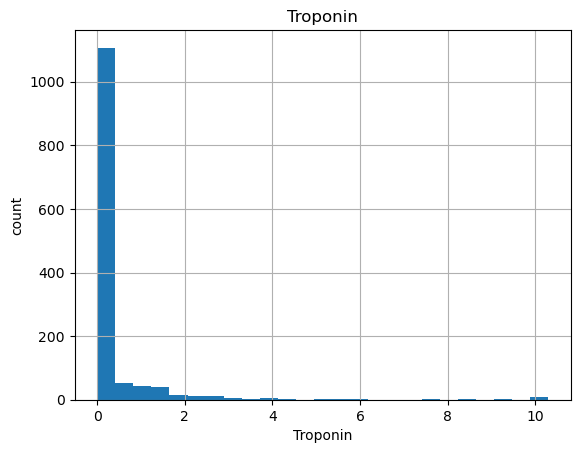

In [80]:
for feature in continous_features:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

## Checking for outliers



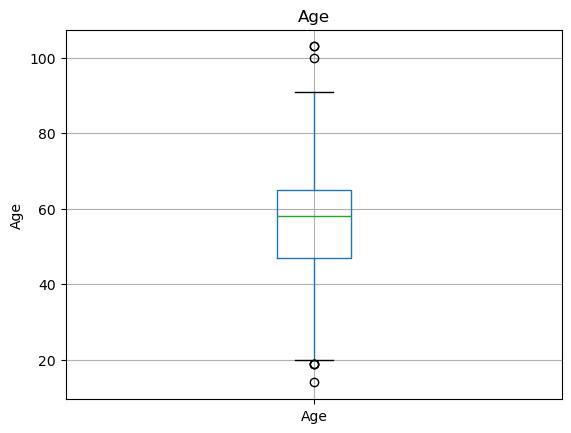

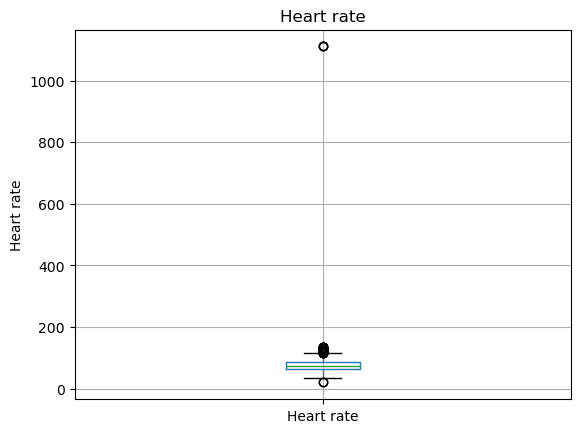

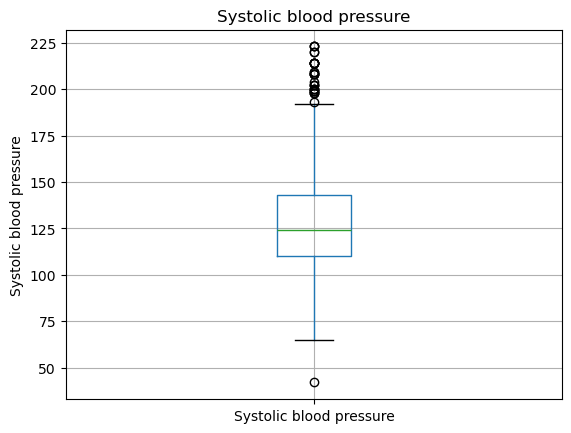

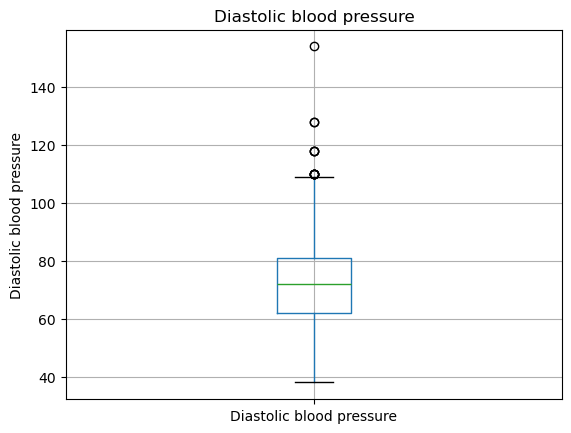

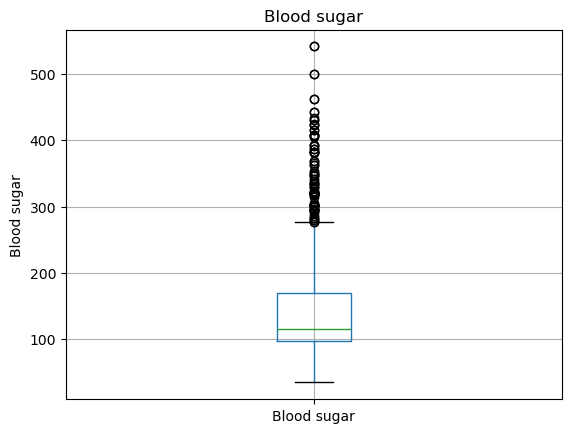

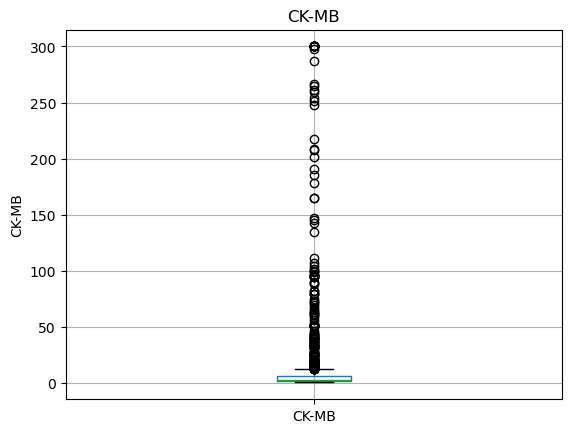

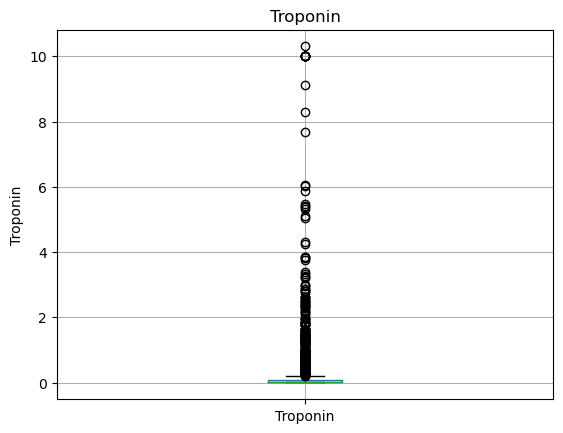

In [81]:
for feature in continous_features:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [82]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


In [83]:
x=data.drop(['Result'],axis=1).copy()
y=data[['Result']].copy()

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 0)

## Scaling the numerical features using StandardScaler

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
x_train.shape,y_train.shape

((1055, 8), (1055, 1))

In [88]:
x_test.shape,y_test.shape


((264, 8), (264, 1))

## Developing the netural network

In [89]:
# Initialising the ANN
classifier = Sequential()

In [103]:
import tensorflow as tf
early_stop= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.010,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [104]:
# Adding the input layer
classifier.add(Dense(units=8,activation='relu'))
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
# Adding  the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [105]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3489 - loss: 0.7616 - val_accuracy: 0.4527 - val_loss: 0.6946
Epoch 2/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6590 - loss: 0.6857 - val_accuracy: 0.8023 - val_loss: 0.6710
Epoch 3/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8509 - loss: 0.6666 - val_accuracy: 0.7765 - val_loss: 0.6602
Epoch 4/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8606 - loss: 0.6492 - val_accuracy: 0.7794 - val_loss: 0.6473
Epoch 5/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8312 - loss: 0.6329 - val_accuracy: 0.7937 - val_loss: 0.6324
Epoch 6/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8134 - loss: 0.6209 - val_accuracy: 0.7822 - val_loss: 0.6184
Epoch 7/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.5912 - val_accuracy: 0.7966 - val_loss: 0.6040
Epoch 8/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8370 - loss: 0.5746 - val_accuracy: 0

In [110]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [111]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [112]:
score

0.8257575757575758